# Hard square

The hard square system is the simplest example of a hard particle Monte Carlo simulation of particles that have orientation.

## Initialize

Import the hoomd python package and the hpmc component to perform hard particle Monte Carlo simulations.

In [1]:
import hoomd
import hoomd.hpmc

Initialize the execution context to control where HOOMD will execute the simulation. This is a very small simulation, run it on the CPU.

In [2]:
hoomd.context.initialize("--mode=cpu");

HOOMD-blue v2.1.5 CUDA (7.5) DOUBLE HPMC_MIXED MPI SSE SSE2 SSE3 SSE4_1 SSE4_2 AVX 
Compiled: 03/12/2017
Copyright 2009-2016 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
-----
You are using HPMC. Please cite the following:
* J A Anderson, M E Irrgang, and S C Glotzer. "Scalable Metropolis Monte Carlo
  for simulation of hard shapes", Computer Physics Communications 204 (2016) 21
  --30
-----
HOOMD-blue is running on the CPU


Initialize the system with particles on a $n$ by $n$ square lattice. The lattice initializer by default creates all particles named type "A".

In [3]:
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.2),
                                   n=10);

notice(2): Group "all" created containing 100 particles


# Define hard particle interactions

Use the ``convex_polygon`` integrator. The parameter *d* sets the maximum displacement for a translation trial move, *a* sets the maximum rotation distance for a rotation move.

In [4]:
mc = hoomd.hpmc.integrate.convex_polygon(d=0.1, a=0.1, seed=1);

Specify the square shape with a list of vertices in counter-clockwise order.

In [5]:
square_verts = [[-0.5, -0.5], [0.5, -0.5], [0.5, 0.5], [-0.5, 0.5]];
mc.shape_param.set('A', vertices=square_verts);

## Write output

Periodically write the particle configurations to a gsd file.

In [6]:
d = hoomd.dump.gsd("trajectory.gsd",
                   period=10,
                   group=hoomd.group.all(),
                   overwrite=True);

## Run the simulation

In [7]:
hoomd.run(100);

** starting run **
Time 00:00:00 | Step 100 / 100 | TPS 2048.38 | ETA 00:00:00
Average TPS: 1865.53
---------
notice(2): -- HPMC stats:
notice(2): Average translate acceptance: 0.553036
notice(2): Average rotate acceptance:    0.790583
notice(2): Trial moves per second:        584488
notice(2): Overlap checks per second:     1.5403e+07
notice(2): Overlap checks per trial move: 26.353
notice(2): Number of overlap errors:      0
** run complete **


## Examine the output

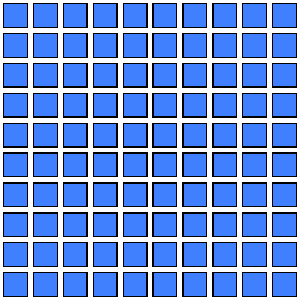

In [8]:
import ex_render
ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, square_verts), 'trajectory.gsd');

## Controlling rotation moves

The __a__ parameter, specified to __integrate.convex_polygon__ defines the maximum rotation move size. In 2D, this is a maximum angle of rotation in radians. In 3D simulations, it is not intuitive to explain, but larger values lead to larger rotations monotonically.

Each trial move has a probability of being either a translation or rotation. You can set that probability with the __move_ratio__ parameter. A value of 0 results in no translation moves and all rotation moves.

In [9]:
mc.set_params(move_ratio=0.0);

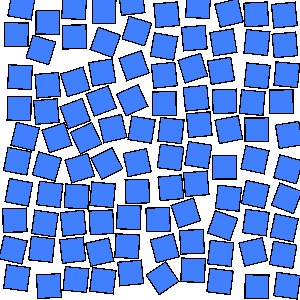

In [10]:
d.disable();
d = hoomd.dump.gsd("trajectory.gsd", period=10, group=hoomd.group.all(), overwrite=True);
hoomd.run(100, quiet=True);
ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, square_verts), 'trajectory.gsd');

Setting __move_ratio__ to 1.0 results in all translation moves.

In [11]:
mc.set_params(move_ratio=1.0);

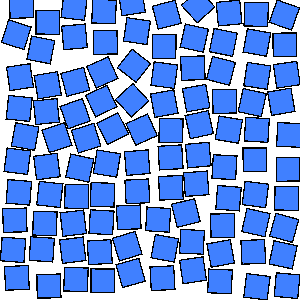

In [12]:
d.disable();
d = hoomd.dump.gsd("trajectory.gsd", period=10, group=hoomd.group.all(), overwrite=True);
hoomd.run(100, quiet=True);
ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, square_verts), 'trajectory.gsd');